# Comparison of Decision Trees, Logistic Regression and Random Forests: Example Code and Exercises

### Import important libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Define functions to visualize the data and the decision boundaries

In [2]:
def scatter_plot_data(x, y, ax):
    '''
    scatter_plot_data scatter plots the satellite data. A point in the plot is colored 'green' if 
    vegetation is present and 'gray' otherwise.
    
    input:
       x - a numpy array of size N x 2, each row is a location, each column is a coordinate
       y - a numpy array of length N, each entry is either 0 (no vegetation) or 1 (vegetation)
       ax - axis to plot on
    returns: 
       ax - the axis with the scatter plot
    '''
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='green', label='vegetation')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='gray', label='nonvegetation')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.legend(loc='best')
    return ax

def plot_decision_boundary(x, y, model, ax, plot_boundary_only=False, poly_degree=1):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x - a numpy array of size N x 2, each row is a location, each column is a coordinate
       y - a numpy array of length N, each entry is either 0 (non-vegetation) or 1 (vegetation)
       model - the 'sklearn' classification model
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
    returns: 
       ax - the axis with the scatter plot
    
    '''
    # Plot data
    if not plot_boundary_only:
        ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='green', label='vegetation')
        ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='gray', label='non-vegetation')
    
    # Create mesh
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_degree > 1):
        polynomial_features = PolynomialFeatures(degree=poly_degree)
        xx = polynomial_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if not plot_boundary_only:
        ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    ax.contour(x1, x2, yy, colors='black', linewidths=0.1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.legend(loc='best')
    return ax

### Define a function to boostrap sample data

In [3]:
def bootstrap_data(x, y):
    '''
    bootstrap_data produces a random subsample of the data x, y.
    input:
       x - a numpy array of size N x 2, each row is a location, each column is a coordinate
       y - a numpy array of length N, each entry is either 0 (non-vegetation) or 1 (vegetation)
    returns: 
       x_sample - a numpy array of size N x 2, randomly sampled from x
       y_sample - a numpy array of length N, randomly sampled from y
    '''
    indices = np.arange(x.shape[0])
    sampled_indices = np.random.choice(indices, x.shape[0])
    x_sample = x[sampled_indices]
    y_sample = y[sampled_indices]
    return x_sample, y_sample

# Application: Monitoring Land Cover Changes Using Satellite Images
In the face of rapid urban development and climate change, it is now more urgent than ever for governments (and other organizations) to have a detailed, accurate and up-to-date picture of land use and land cover, as well as how the land use/cover is changing over time, in order to make effective policy decision to manage and protect natural resources. Building such a comprehensive picture of land use/cover for a large region is extremely difficult. 

Recent improvements in satellite imagery and image process have allowed for new tools in land use/cover analysis. The following is an image of the change in vegetation cover around Belize and Guatamala from 1975 to 2007:

<img src="./fig/sat.jpg">

In this problem, we will explore how to use classifiers to detect the presence and location of vegetation in satellite images.

Each of the following files contain a small sample of locations from satelite aeriel images: `dataset_1.txt`, ... `dataset_4.txt`. The first two columns contain the normalized latitude and longitude values. The last column indicates whether or not the location contains vegetation, with 1 indicating the presence of vegetation and 0 indicating otherwise.

These small sets of labels are typically generated by hand (that is, locations might be classified based on field studies or by cross-referencing with government databases). Your task is to use the labeled locations to train a model that will predict whether a new location is vegetation or non-vegetation.

---

## When is a decison tree better than logistic regression?
In this exercise we explore when a decision tree is more appropriate than logistic regression.

### 1. Load the satellite image from file

In [4]:
#load the satellite image
sat_img_2 = pd.read_csv('data/dataset_2.txt', delimiter=',', header=None)
#get the long/lat coords
x = sat_img_2.values[:, :-1]
#get the class labels
y = sat_img_2.values[:, -1]

### 2. Visualize the data

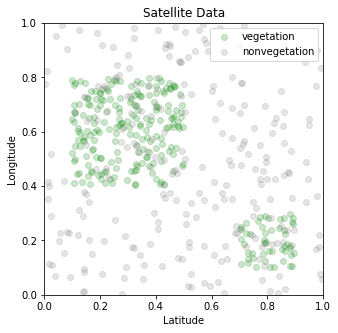

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

scatter_plot_data(x, y, ax)

ax.set_title('Satellite Data')
ax.legend(loc='best')
plt.show()

Which classification model do you think will do better on this dataset: logistic regression (with non-linear boundaries) or decision tree?

### 3. Compare logistic regression with decision tree
Fit a logistic regression model (with quadratic boundary) to the data. Then fit a decision tree to the data. Which model fits the data better? Why?

In [6]:
#fit a decision tree
tree = DecisionTree(max_depth=5)
tree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
#transform your training and testing data into polynomial features
polynomial_features = PolynomialFeatures(2)
polynomial_features.fit(x)
x_poly = polynomial_features.transform(x)

#fit a logistic regression on top of your polynomial features
logistic_poly = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_poly.fit(x_poly, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

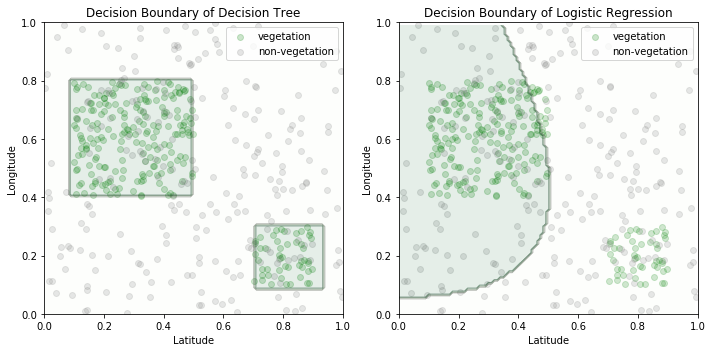

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#plot the decision tree boundary
plot_decision_boundary(x, y, tree, ax[0])

ax[0].set_title('Decision Boundary of Decision Tree')

#plot the logistic regression boundary
plot_decision_boundary(x, y, logistic_poly, ax[1], poly_degree=2)

ax[1].set_title('Decision Boundary of Logistic Regression')
plt.tight_layout()
plt.show()

---

## When is a random forest better than a decision tree?
In this exercise we explore the advantages of random forests over decision trees.

### 1. Load the satellite image from file

In [9]:
#load the satellite image
sat_img_4 = pd.read_csv('data/dataset_4.txt', delimiter=',', header=None)
#get the long/lat coords
x = sat_img_4.values[:, :-1]
#get the class labels
y = sat_img_4.values[:, -1]

### 2. Visualize the data

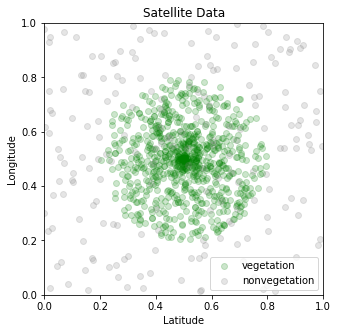

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

scatter_plot_data(x, y, ax)

ax.set_title('Satellite Data')
ax.legend(loc='best')
plt.show()

### 3. Fit a deep decision tree to the data and visualize the decision boundary

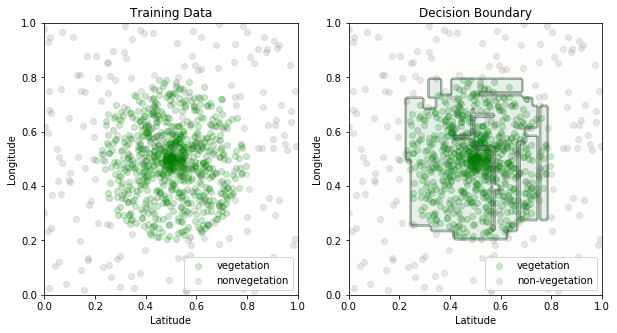

In [11]:
#fit a decision tree
tree = DecisionTree(max_depth=1000)
tree.fit(x, y)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#visualize the data
scatter_plot_data(x, y, ax[0])
ax[0].set_title('Training Data')

#visualize the decision boundary
plot_decision_boundary(x, y, tree, ax[1])
ax[1].set_title('Decision Boundary')
plt.show()

Why isn't the tree's decision boundary a circle? Is this a problem (**Hint**: relate what you're seeing to the concepts of overfitting, high variance and generalization error)?

## 4. Investigate the variance of this tree
Boostrap two different training data samples and fit two different trees. Compare their decision boundaries.

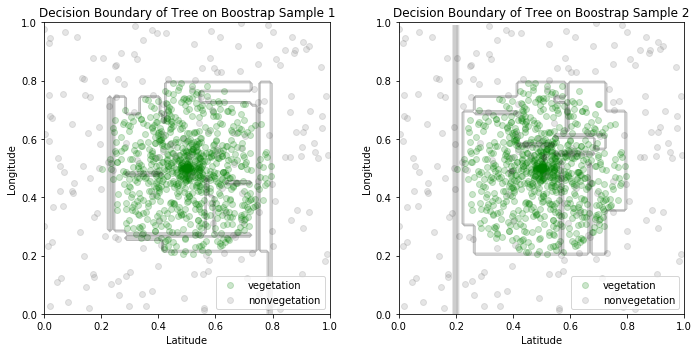

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#plot the data on subplot 1
scatter_plot_data(x, y, ax[0])
#boostrap sample data
x_sample, y_sample = bootstrap_data(x, y)
#fit a decision tree
tree.fit(x_sample, y_sample)
#plot the decision tree boundary
plot_decision_boundary(x, y, tree, ax[0], plot_boundary_only=True)

ax[0].set_title('Decision Boundary of Tree on Boostrap Sample 1')

#plot the data on subplot 2
scatter_plot_data(x, y, ax[1])
#boostrap sample data
x_sample, y_sample = bootstrap_data(x, y)
#fit a decision tree
tree.fit(x_sample, y_sample)
#plot the decision tree boundary
plot_decision_boundary(x, y, tree, ax[1], plot_boundary_only=True)

ax[1].set_title('Decision Boundary of Tree on Boostrap Sample 2')
plt.tight_layout()
plt.show()

## Exercise: Bagging for Trees
Use the `bootstrap_data` function to boostrap sample 100 training datasets from `x` and `y`. Fit a decision tree to each bootstrap sample of the data. Plot their decision boundaries. Plot the decision boundaries of this ensemble of trees after bagging (i.e. plot a random forest with 100 trees).

## Solution:

In [13]:
# #fit a random forest
# forest = RandomForest(n_estimators=100, max_depth=1000)
# forest.fit(x, y)

In [14]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# #plot the data on subplot 1
# scatter_plot_data(x, y, ax[0])
# #plot the data on subplot 2
# scatter_plot_data(x, y, ax[1])

# #fit 100 trees
# for i in range(100):
#     #boostrap sample data
#     x_sample, y_sample = bootstrap_data(x, y)
#     #fit a decision tree
#     tree.fit(x_sample, y_sample)
#     #plot the decision tree boundary
#     plot_decision_boundary(x, y, tree, ax[0], plot_boundary_only=True)

# ax[0].set_title('Decision Boundary of 100 Trees')

# #plot the random forest's decision boundary
# plot_decision_boundary(x, y, forest, ax[1], plot_boundary_only=True)
# ax[1].set_title('Decision Boundary of a Forest of 100 Trees')
# plt.show()